In [1]:
import numpy as np
import pandas as pd

In [2]:
scores = pd.read_csv('/kaggle/input/the-depression-dataset/data/scores.csv')
cond_1 = pd.read_csv('/kaggle/input/the-depression-dataset/data/condition/condition_1.csv')
cont_1 = pd.read_csv('/kaggle/input/the-depression-dataset/data/control/control_1.csv')

In [3]:
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In this work, we will try to produce a model which can predict if the person is in depression or not given the person's activity log, gender and age. As the other columns are available only for the group with depression, we can't use them for this purpose.

In [4]:
scores['depression'] = scores['madrs1'].apply(lambda x: 1 if x>0 else 0)

In [5]:
scores.dropna(axis=1, inplace=True)

In [6]:
scores['gender'] = scores['gender'].apply(lambda x: 1 if x==1 else 0)
dummies = pd.get_dummies(scores['age'], drop_first=True)
scores = pd.concat([scores, dummies], axis=1).drop('age', axis=1)

All the activity data is in different shapes as they are hourly activity logs and they are all recorded for different durations. That's why we can't feed them to a model directly. Most basic approach would be calculating their mean, median, standard deviation, minimum and maximum and feeding them to a model. If it doesn't work out then we will try different things.

In [7]:
data = []
for i in range(1,24):
    cond = pd.read_csv(f'/kaggle/input/the-depression-dataset/data/condition/condition_{i}.csv')
    l = [cond['activity'].mean(), cond['activity'].median(), cond['activity'].std(), cond['activity'].min(), cond['activity'].max()]
    data.append(l)

for i in range(1,33):
    cond = pd.read_csv(f'/kaggle/input/the-depression-dataset/data/control/control_{i}.csv')
    l = [cond['activity'].mean(), cond['activity'].median(), cond['activity'].std(), cond['activity'].min(), cond['activity'].max()]
    data.append(l)


In [8]:
col = ['mean', 'median', 'std', 'min', 'max']
activity = pd.DataFrame(data,columns=col)

In [9]:
df = pd.concat([scores,activity], axis=1).drop('number', axis=1)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

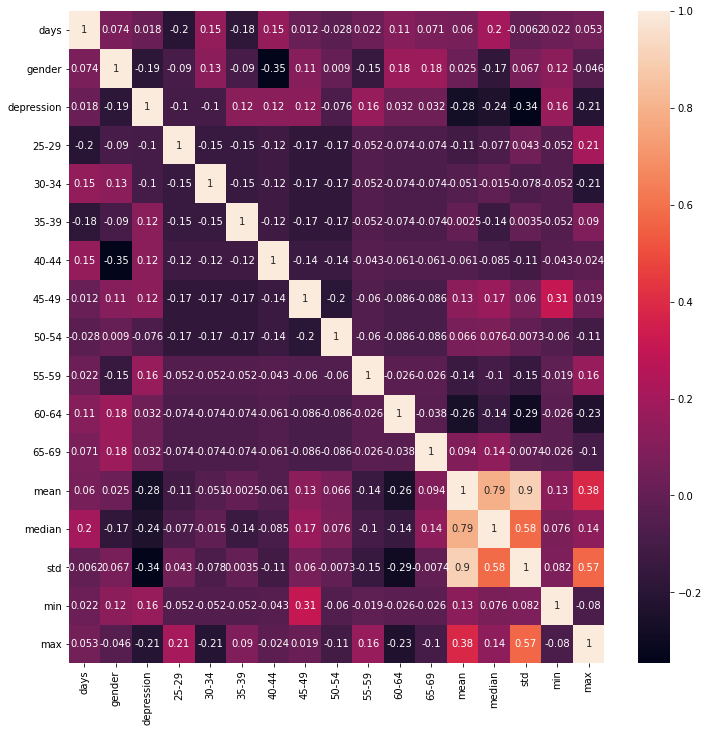

In [11]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

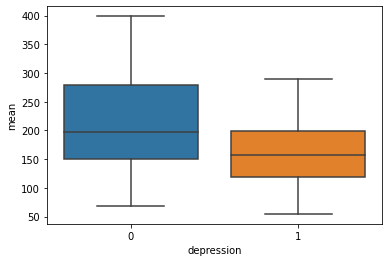

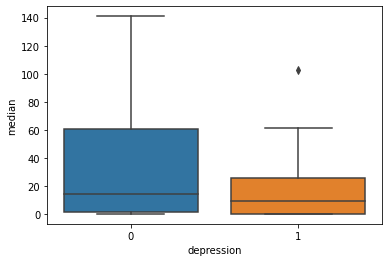

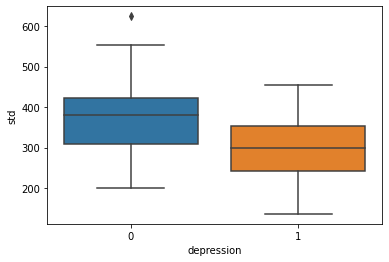

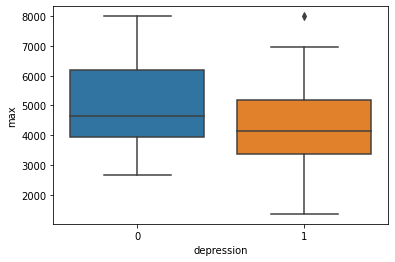

In [12]:
l=['mean', 'median', 'std', 'max']
for i in l:
    sns.boxplot(x='depression', y=i, data=df)
    plt.show()

As seen from the graphs,the aggregate fucntions has correlation with depression. At most mean and standard devaiation are correlated.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
y = df['depression']
df.drop('depression', axis=1, inplace=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=2)

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [17]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[6 1]
 [3 1]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.50      0.25      0.33         4

    accuracy                           0.64        11
   macro avg       0.58      0.55      0.54        11
weighted avg       0.61      0.64      0.60        11



64% isn't a good accuracy value, so let's try different models

In [18]:
rfc = RandomForestClassifier(100, random_state=2)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [19]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[7 0]
 [1 3]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.75      0.86         4

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11



91% accuracy is a good score with this amount of data. The data we have has only 55 people which is a very low value. With more data, the accuracy would increase more.